In [3]:
import os
import time
#mysys="jupyter" #
mysys="colab"
split="_90_5_5b_"
sn='sn_'
test_ratio=0.05

training_samples=167400
testing_samples=9300
validation_samples=9300

if mysys=="colab":
    from google.colab import drive
    drive.mount('/content/drive')
    in_path='/content/drive/MyDrive/UNSW_Data/'
    datapath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/'
    modelpath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/'
    slash="/"
    ML_path=datapath+'ml2/'
    STDN_path=ML_path+ '/ml/stdn/'
else:
    current_folder = os.getcwd() + kkk
    print(current_folder)
    slash="\\"
    path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\\'
    print(path)
    ML_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\\'
    STDN_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\stdn\\'

print(in_path)
print(datapath)
performance_data=[]

in_f_train= in_path + 'UNSW_NB15_training-set.csv'
in_f_test=in_path+'UNSW_NB15_testing-set.csv'
f_features=in_path+ 'UNSW_NB15_f.csv'
out_f_train=datapath+'unsw-nb15_training' + split +'.csv'
out_f_test=datapath+'unsw-nb15_testing' + split+ '.csv'
out_f_validation=datapath+'unsw-nb15_validation' + split+ '.csv'

shallow_model_path=modelpath+ 'shallow_model_ANN5.keras'
deep_model_path=modelpath+ 'deep_model_ANN5.keras'

shallow_model_path_best_hp=modelpath+ 'shallow_model_ANN5_hp.keras'
deep_model_path_best_hp=modelpath+ 'deep_model_ANN5_hp.keras'

in_f_features=in_path + 'UNSW_NB15_f.csv'

f_performance_data=modelpath+ 'cp2_small_data_performance.csv'
f_hp_data=modelpath+ 'cp2_small_data_hp.csv'


print(in_f_train)
print(in_f_test)
print(in_f_features)
print(out_f_train)
print(out_f_test)
print(out_f_validation)

Mounted at /content/drive
/content/drive/MyDrive/UNSW_Data/
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_training-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_testing-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_f.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features
features = ['ct_state_ttl', 'sload', 'rate', 'sttl', 'smean', 'dload', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'dttl', 'ct_dst_sport_ltm', 'dmean','ct_srv_src', 'dinpkt', 'tcprtt', 'dur', 'synack', 'sinpkt']
#features2= ['ct_state_ttl', 'sload', 'rate', 'sttl', 'smean', 'dload', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'dttl', 'ct_dst_sport_ltm', 'dmean', 'ct_srv_src', 'dinpkt', 'tcprtt', 'dur', 'synack', 'sinpkt'], 'proto', 'dport', 'stime']

# Load preprocessed data for training and testing
df_train = pd.read_csv(out_f_train)
df_test = pd.read_csv(out_f_test)
df_val = pd.read_csv(out_f_validation)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167400 entries, 0 to 167399
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 167400 non-null  int64  
 1   dur                167400 non-null  float64
 2   proto              167400 non-null  object 
 3   service            167400 non-null  object 
 4   state              167400 non-null  object 
 5   spkts              167400 non-null  int64  
 6   dpkts              167400 non-null  int64  
 7   sbytes             167400 non-null  int64  
 8   dbytes             167400 non-null  int64  
 9   rate               167400 non-null  float64
 10  sttl               167400 non-null  int64  
 11  dttl               167400 non-null  int64  
 12  sload              167400 non-null  float64
 13  dload              167400 non-null  float64
 14  sloss              167400 non-null  int64  
 15  dloss              167400 non-null  int64  
 16  si

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9300 non-null   int64  
 1   dur                9300 non-null   float64
 2   proto              9300 non-null   object 
 3   service            9300 non-null   object 
 4   state              9300 non-null   object 
 5   spkts              9300 non-null   int64  
 6   dpkts              9300 non-null   int64  
 7   sbytes             9300 non-null   int64  
 8   dbytes             9300 non-null   int64  
 9   rate               9300 non-null   float64
 10  sttl               9300 non-null   int64  
 11  dttl               9300 non-null   int64  
 12  sload              9300 non-null   float64
 13  dload              9300 non-null   float64
 14  sloss              9300 non-null   int64  
 15  dloss              9300 non-null   int64  
 16  sinpkt             9300 

In [6]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9300 non-null   int64  
 1   dur                9300 non-null   float64
 2   proto              9300 non-null   object 
 3   service            9300 non-null   object 
 4   state              9300 non-null   object 
 5   spkts              9300 non-null   int64  
 6   dpkts              9300 non-null   int64  
 7   sbytes             9300 non-null   int64  
 8   dbytes             9300 non-null   int64  
 9   rate               9300 non-null   float64
 10  sttl               9300 non-null   int64  
 11  dttl               9300 non-null   int64  
 12  sload              9300 non-null   float64
 13  dload              9300 non-null   float64
 14  sloss              9300 non-null   int64  
 15  dloss              9300 non-null   int64  
 16  sinpkt             9300 

In [7]:
# Separate features and labels for training set
X_train = df_train[features].values # assuming 'label' is the column containing labels
y_train = df_train['label'].values

# Separate features and labels for testing set
X_test = df_test[features].values  # assuming 'label' is the column containing labels
y_test = df_test['label'].values

# Separate features and labels for testing set
X_val =df_val[features].values  # assuming 'label' is the column containing labels
y_val =df_val['label'].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape,y_val.shape)
print(X_train.shape[0]/(X_train.shape[0]+ X_test.shape[0]))
print(X_test.shape[0]/(X_test.shape[0]+ X_test.shape[0]))
print(X_val.shape[0]/(X_val.shape[0]+ X_val.shape[0]))

(167400, 20) (167400,) (9300, 20) (9300,) (9300, 20) (9300,)
0.9473684210526315
0.5
0.5


In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [9]:
import time
import psutil
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

#performance_metrics = []

def get_system_info():
    # Get CPU and memory usage
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().percent
    return cpu_usage, memory_usage

# Define function to calculate training and testing time
def calculate_time(start_time):
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

def evaluate_performance(title, test_loss, test_accuracy, y_test, y_preds, cpu_use, mem_use, training_time, test_time,  prt):
    #accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    roc_auc = roc_auc_score(y_test, y_preds)
    avg_precision = average_precision_score(y_test, y_preds)
    conf_matrix = confusion_matrix(y_test, y_preds)

    metrics ={
        'data': title,
        'time': time.time(),
        'Training time':  training_time,
        'test time':test_time,
        'memory usage':mem_use,
        'cpu usage': cpu_use,
        'accuracy': test_accuracy,
        'loss' :test_loss,
        'precision':  precision,
        'recall' : recall,
        'f1_score':   f1,
        'roc_auc' :roc_auc,
        'avg_precision':avg_precision,
        'conf_matrix':  conf_matrix,
    }

    if prt == 1:
        print(title, "Model Performance: ")
        print ('Training time',  training_time)
        print ('Testing time',  test_time)
        print ('Memory Usage', mem_use)
        print ('CPU usage', cpu_use)
        print("Test Accuracy:", test_accuracy)
        print("Test Loss:", test_loss)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("roc_auc", roc_auc)
        print("avg_precision",avg_precision)
        print("Confusion Matrix:")
        print(conf_matrix)

    return metrics

# Define function to display performance metrics
def display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision):
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Average Precision Score:", avg_precision)

## Shallow *ANN* Model

In [10]:
# Define Shallow model hyperparameters
shallow_hyperparameters = {
    'input_dim': len(features),
    'neurons_layer1': 512,
    'activation_layer1': 'relu',
    'learning_rate': 0.0001
}

# Define paths and model name
modelpath = shallow_model_path
model_name = 'shallow_model_ANN'



In [11]:
from sklearn.metrics import confusion_matrix
# Define shallow ANN model function
def create_shallow_ann_model(input_dim, neurons_layer1, activation_layer1, learning_rate):
    model = Sequential()

    # hidden layer 1
    model.add(Dense(neurons_layer1, input_dim=input_dim, activation=activation_layer1))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Create the shallow ANN model with the best hyperparameters
start_time = time.time()
shallow_model = create_shallow_ann_model(**shallow_hyperparameters)
train_time = calculate_time(start_time)

# Train the model on the training data
start_time = time.time()
history = shallow_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
cpu_usage, memory_usage=get_system_info()
train_time += calculate_time(start_time)

# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = shallow_model.evaluate(X_test, y_test)
test_time = calculate_time(start_time)

# Calculate additional performance metrics on the validation set
y_pred_val = shallow_model.predict(X_test)

val_accuracy = accuracy_score(y_test, np.round(y_pred_val))
precision = precision_score(y_test, np.round(y_pred_val))
recall = recall_score(y_test, np.round(y_pred_val))
f1 = f1_score(y_test, np.round(y_pred_val))
roc_auc = roc_auc_score(y_test, y_pred_val)
avg_precision = average_precision_score(y_test, y_pred_val)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred_val))

# Display performance metrics
display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision)
summary=shallow_model.summary()
print(summary)

# Save the trained model for inference
#joblib.dump(shallow_model, modelpath)
tf.keras.models.save_model(shallow_model, modelpath)
# Collect memory usage, CPU usage, and append to an array
metrics = {
    'Time':time.time(),
    'Model': model_name,
    'Training Time': train_time,
    'Testing Time': test_time,
    'Memory Usage': memory_usage,
    'CPU Usage': cpu_usage,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc,
    'Average Precision Score': avg_precision,
    "Confusion Matrix" : conf_matrix
}


Epoch 1/20
4185/4185 [==============================] - 10s 2ms/step - loss: 0.2688 - accuracy: 0.8716 - val_loss: 0.2242 - val_accuracy: 0.8896
Epoch 2/20
4185/4185 [==============================] - 9s 2ms/step - loss: 0.2119 - accuracy: 0.8948 - val_loss: 0.2056 - val_accuracy: 0.8971
Epoch 3/20
4185/4185 [==============================] - 8s 2ms/step - loss: 0.1990 - accuracy: 0.8997 - val_loss: 0.1966 - val_accuracy: 0.9012
Epoch 4/20
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1913 - accuracy: 0.9056 - val_loss: 0.1908 - val_accuracy: 0.9038
Epoch 5/20
4185/4185 [==============================] - 8s 2ms/step - loss: 0.1860 - accuracy: 0.9093 - val_loss: 0.1851 - val_accuracy: 0.9114
Epoch 6/20
4185/4185 [==============================] - 8s 2ms/step - loss: 0.1820 - accuracy: 0.9124 - val_loss: 0.1821 - val_accuracy: 0.9117
Epoch 7/20
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1789 - accuracy: 0.9140 - val_loss: 0.1791 - val_accuracy

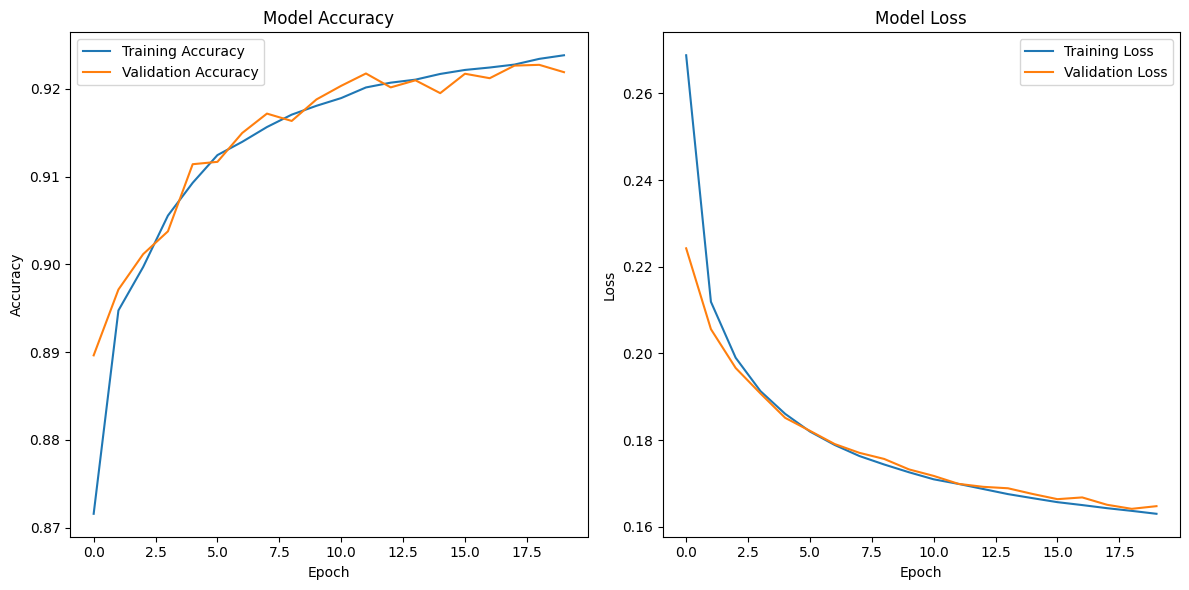

In [12]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


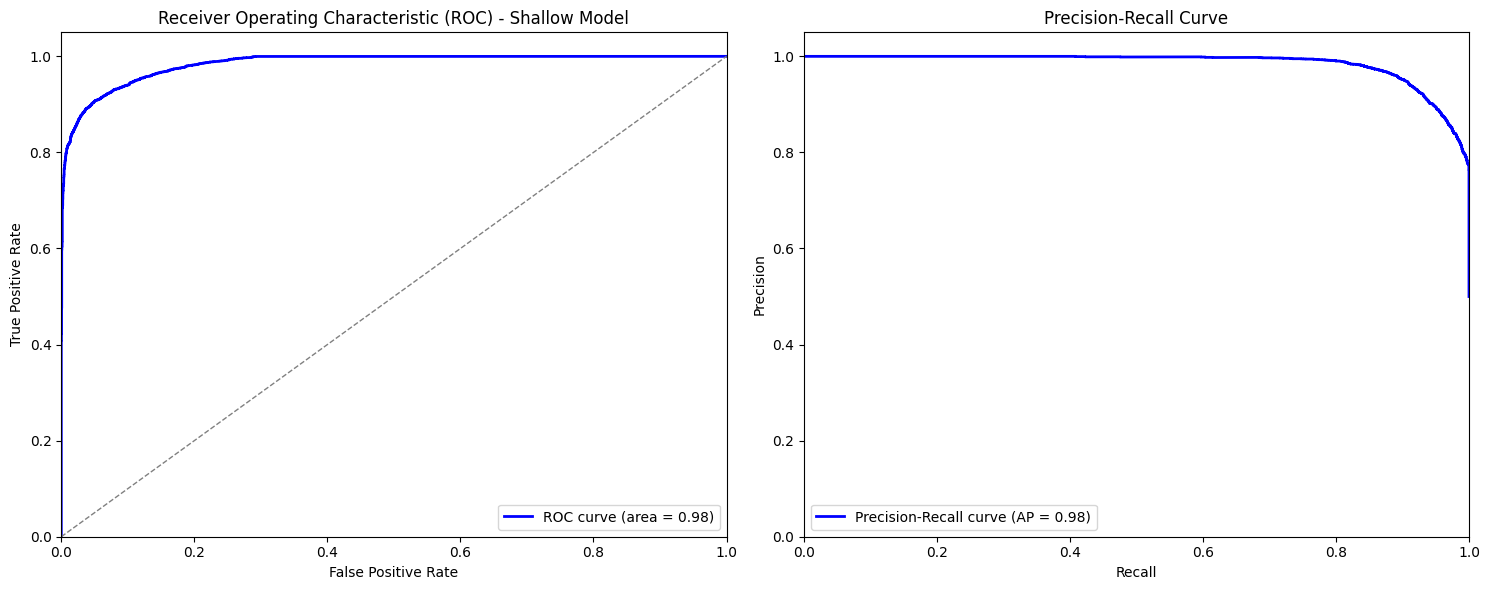

In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


In [14]:
#Append the metrics to an array
performance_data.append(metrics)

# Convert performance_metrics array to DataFrame
df_performance_data = pd.DataFrame(performance_data)
# Display the DataFrame
print(df_performance_data)

           Time              Model  Training Time  Testing Time  Memory Usage  \
0  1.712164e+09  shallow_model_ANN     202.791085      0.688525          12.8   

   CPU Usage  Test Loss  Test Accuracy  Validation Accuracy  Precision  \
0       40.7    0.15768       0.927957             0.927957   0.945389   

     Recall  F1 Score  ROC-AUC Score  Average Precision Score  \
0  0.908387  0.926519       0.984141                 0.984953   

             Confusion Matrix  
0  [[4406, 244], [426, 4224]]  


## Deep Model ANN

In [15]:
# Define deep model hyperparameters
deep_hyperparameters = {
    'input_dim': len(features),
    'neurons_layer1': 256,
    'activation_layer1': 'relu',
    'neurons_layer2': 128,
    'activation_layer2': 'relu',
    'neurons_layer3': 64,
    'activation_layer3': 'relu',
    'neurons_layer4': 32,
    'activation_layer4': 'relu',
    'neurons_layer5': 16,
    'activation_layer5': 'relu',
    'neurons_layer6': 8,
    'activation_layer6': 'relu',
    'neurons_layer7': 4,
    'activation_layer7': 'relu',
    'learning_rate': 0.0001
}

# Define paths and model name
modelpath = deep_model_path
model_name = 'deep_model_ANN'



In [16]:
def create_deep_ann_model(input_dim, neurons_layer1, activation_layer1, neurons_layer2, activation_layer2, neurons_layer3, activation_layer3,
                          neurons_layer4, activation_layer4, neurons_layer5, activation_layer5, neurons_layer6, activation_layer6,
                          neurons_layer7, activation_layer7, learning_rate):
    model = Sequential()

    # Hidden layer 1
    model.add(Dense(neurons_layer1, input_dim=input_dim, activation=activation_layer1))

    # Hidden layer 2
    model.add(Dense(neurons_layer2, activation=activation_layer2))

    # Hidden layer 3
    model.add(Dense(neurons_layer3, activation=activation_layer3))

    # Hidden layer 4
    model.add(Dense(neurons_layer4, activation=activation_layer4))

    # Hidden layer 5
    model.add(Dense(neurons_layer5, activation=activation_layer5))

    # Hidden layer 6
    model.add(Dense(neurons_layer6, activation=activation_layer6))

    # Hidden layer 7
    model.add(Dense(neurons_layer7, activation=activation_layer7))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the deep ANN model with the best hyperparameters
start_time = time.time()
deep_model = create_deep_ann_model(**deep_hyperparameters)
train_time = calculate_time(start_time)

# Train the model on the training data
start_time = time.time()
history = deep_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
train_time += calculate_time(start_time)
cpu_usage, memory_usage=get_system_info()

# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = deep_model.evaluate(X_test, y_test)
test_time = calculate_time(start_time)

# Calculate additional performance metrics on the validation set
y_pred_val = deep_model.predict(X_test)
val_accuracy = accuracy_score(y_test, np.round(y_pred_val))
precision = precision_score(y_test, np.round(y_pred_val))
recall = recall_score(y_test, np.round(y_pred_val))
f1 = f1_score(y_test, np.round(y_pred_val))
roc_auc = roc_auc_score(y_test, y_pred_val)
avg_precision = average_precision_score(y_test, y_pred_val)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred_val))

# Display performance metrics
display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision)

summary=deep_model.summary()
print(summary)

# Save the trained model for inference
#tf.keras.models.save_model(deep_model, modelpath)


# Collect memory usage, CPU usage, and append to an array
metrics = {
    'Time':time.time(),
    'Model': model_name,
    'Training Time': train_time,
    'Testing Time': test_time,
    'Memory Usage': memory_usage,
    'CPU Usage': cpu_usage,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc,
    'Average Precision Score': avg_precision,
    'Confusion Matrix' : conf_matrix
}


Epoch 1/20
4185/4185 [==============================] - 13s 3ms/step - loss: 0.2412 - accuracy: 0.8911 - val_loss: 0.1831 - val_accuracy: 0.9095
Epoch 2/20
4185/4185 [==============================] - 12s 3ms/step - loss: 0.1771 - accuracy: 0.9125 - val_loss: 0.1716 - val_accuracy: 0.9159
Epoch 3/20
4185/4185 [==============================] - 12s 3ms/step - loss: 0.1680 - accuracy: 0.9182 - val_loss: 0.1652 - val_accuracy: 0.9203
Epoch 4/20
4185/4185 [==============================] - 12s 3ms/step - loss: 0.1619 - accuracy: 0.9224 - val_loss: 0.1606 - val_accuracy: 0.9234
Epoch 5/20
4185/4185 [==============================] - 12s 3ms/step - loss: 0.1584 - accuracy: 0.9240 - val_loss: 0.1625 - val_accuracy: 0.9237
Epoch 6/20
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1555 - accuracy: 0.9258 - val_loss: 0.1664 - val_accuracy: 0.9226
Epoch 7/20
4185/4185 [==============================] - 12s 3ms/step - loss: 0.1530 - accuracy: 0.9275 - val_loss: 0.1514 - val_ac

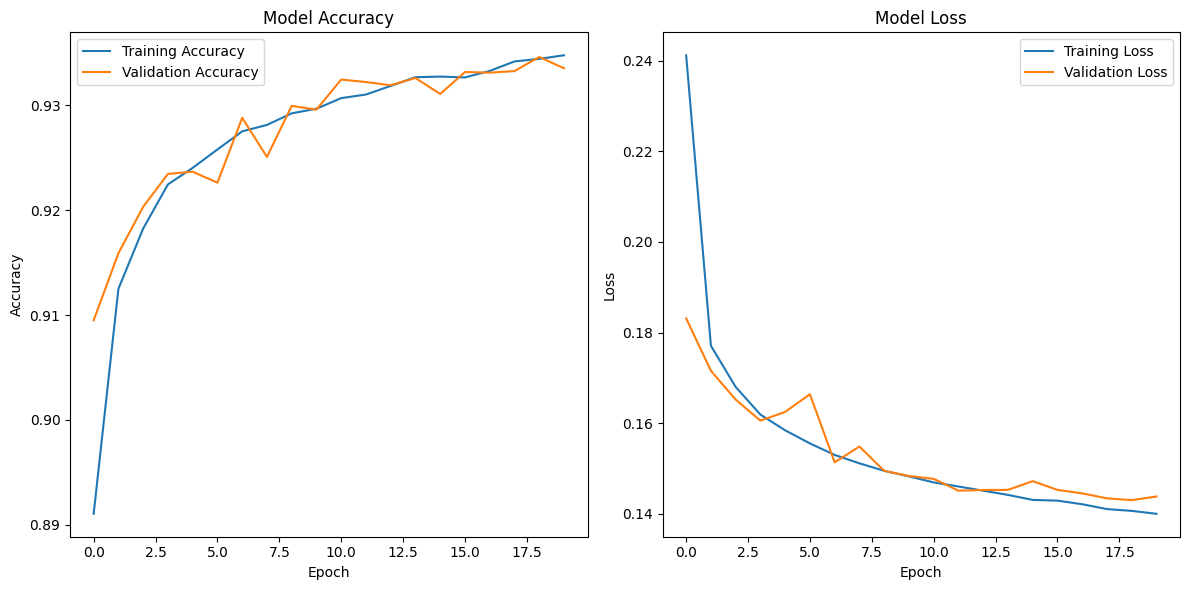

In [17]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


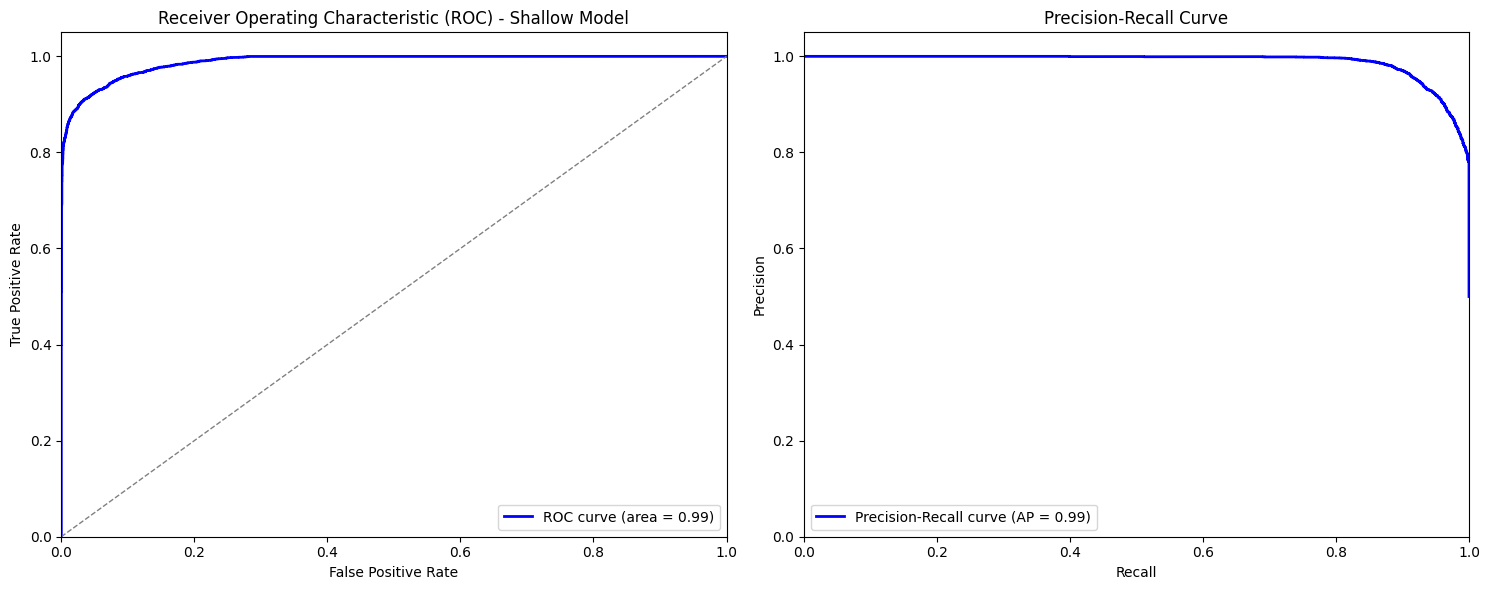

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


In [19]:
#Append the metrics to an array
performance_data.append(metrics)

# Convert performance_metrics array to DataFrame
df_performance_data = pd.DataFrame(performance_data)

# Display the DataFrame
print(df_performance_data)
df_performance_data.to_csv(f_performance_data, index=False)
print(f_performance_data, "Saved")

           Time              Model  Training Time  Testing Time  Memory Usage  \
0  1.712164e+09  shallow_model_ANN     202.791085      0.688525          12.8   
1  1.712164e+09     deep_model_ANN     263.399727      0.729605          13.1   

   CPU Usage  Test Loss  Test Accuracy  Validation Accuracy  Precision  \
0       40.7   0.157680       0.927957             0.927957   0.945389   
1       57.2   0.134302       0.937204             0.937204   0.958709   

     Recall  F1 Score  ROC-AUC Score  Average Precision Score  \
0  0.908387  0.926519       0.984141                 0.984953   
1  0.913763  0.935697       0.988298                 0.989014   

             Confusion Matrix  
0  [[4406, 244], [426, 4224]]  
1  [[4467, 183], [401, 4249]]  
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/cp2_small_data_performance.csv Saved


## Hyperparameter Tuning

In [20]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [21]:
from kerastuner.tuners import RandomSearch, Hyperband


<ipython-input-21-e64760501d7e>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband


## Hyperparameter tuning - shallow model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions

from kerastuner import RandomSearch
from kerastuner import HyperParameters

modelname="shallow_model"
hpt_method="random search"
hp_array=[]

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def build_shallow_ann_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=512,
                    input_dim=len(features),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                                     l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Dropout layer (optional)
    if hp['use_dropout']:
        model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



# Create a HyperParameters object
hp = HyperParameters()

# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)  # Dropout rate hyperparameter


0.0

In [24]:
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_shallow_ann_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='shallow_ann_hp_tuning_RS',
    hyperparameters=hp  # Use the HyperParameters object
)

# Record start time
start_time = time.time()

# Perform hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

cpu_usage, memory_usage=get_system_info()


# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Additional regression metrics
regression_metrics = {
    'mse': test_metrics[0],  # Mean Squared Error
    'mae': test_metrics[1],  # Mean Absolute Error
    'r_squared': 1 - (np.sum((y_test - y_pred.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)),
    'explained_variance': 1 - (np.var(y_test - y_pred.flatten()) / np.var(y_test))
}

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - elapsed_time", elapsed_time)
print("- memory_usage", memory_usage)
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)

print("Regression Metrics:")
for metric_name, metric_value in regression_metrics.items():
    print(f" - {metric_name}: {metric_value}")

# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
    'regression_metrics': regression_metrics
}
print(experiment_details)
hp_array.append(experiment_details)


Trial 20 Complete [00h 01m 27s]
val_accuracy: 0.8794205784797668

Best val_accuracy So Far: 0.9284946322441101
Total elapsed time: 00h 37m 36s
Epoch 1/100
4185/4185 [==============================] - 10s 2ms/step - loss: 0.2069 - accuracy: 0.8996 - val_loss: 0.1874 - val_accuracy: 0.9074
Epoch 2/100
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1855 - accuracy: 0.9126 - val_loss: 0.1808 - val_accuracy: 0.9133
Epoch 3/100
4185/4185 [==============================] - 8s 2ms/step - loss: 0.1816 - accuracy: 0.9157 - val_loss: 0.1672 - val_accuracy: 0.9202
Epoch 4/100
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1776 - accuracy: 0.9190 - val_loss: 0.1759 - val_accuracy: 0.9188
Epoch 5/100
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1737 - accuracy: 0.9205 - val_loss: 0.1646 - val_accuracy: 0.9244
Epoch 6/100
4185/4185 [==============================] - 8s 2ms/step - loss: 0.1670 - accuracy: 0.9222 - val_loss: 0.1680 - val_ac

In [25]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)

Epoch with maximum validation accuracy: 93
Maximum validation accuracy: 0.9331242442131042
Epoch with minimum validation loss: 80
Minimum validation loss: 0.15191350877285004


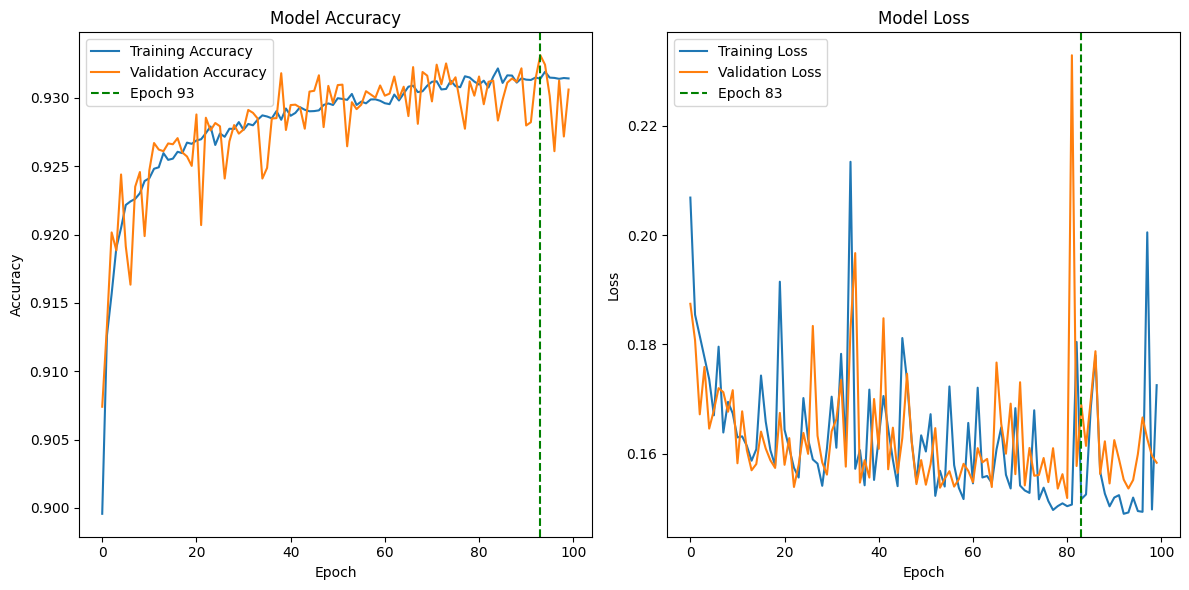

In [26]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].axvline(x=93, color='g', linestyle='--', label='Epoch 93')  # Vertical line at epoch 60
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].axvline(x=83, color='g', linestyle='--', label='Epoch 83')  # Vertical line at epoch 60
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


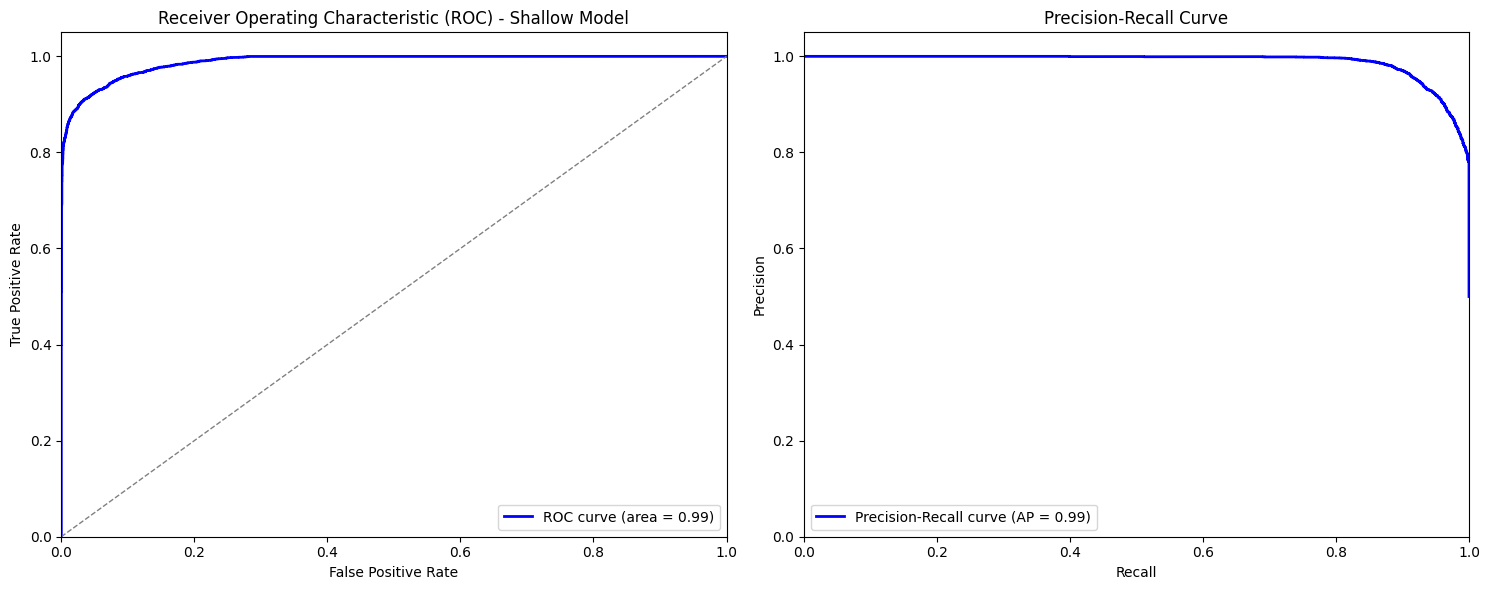

In [27]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


#Creating the final shallow model

In [28]:
from keras.callbacks import ModelCheckpoint

# Define the filepath to save the model
checkpoint_filepath = shallow_model_path_best_hp

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint(checkpoint_filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with early stopping and ModelCheckpoint callback
history = best_model.fit(X_train, y_train,
                          epochs=max_val_acc_epoch,
                          validation_split=0.2,
                          callbacks=[checkpoint])




Epoch 1/93
4178/4185 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9018
Epoch 1: val_accuracy improved from -inf to 0.91048, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/shallow_model_ANN5_hp.keras
4185/4185 [==============================] - 10s 2ms/step - loss: 0.2041 - accuracy: 0.9018 - val_loss: 0.1899 - val_accuracy: 0.9105
Epoch 2/93
4174/4185 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.9142
Epoch 2: val_accuracy improved from 0.91048 to 0.91535, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/shallow_model_ANN5_hp.keras
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1833 - accuracy: 0.9143 - val_loss: 0.1847 - val_accuracy: 0.9154
Epoch 3/93
4178/4185 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.9174
Epoch 3: val_accuracy did not improve from 0.91535
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1808 - accu

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               10752     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


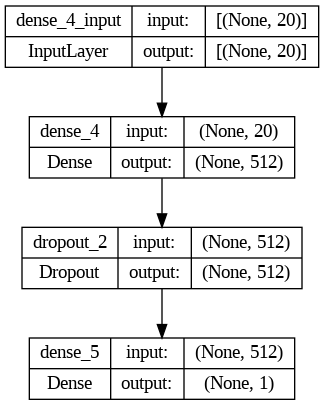

In [29]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model, Model

best_model =load_model(checkpoint_filepath)

# Display the summary of the loaded model
best_model.summary()

# Plot the architecture of the loaded model
plot_model(best_model, to_file='shallow_model_best_plot.png', show_shapes=True, show_layer_names=True)

## ANN Shallow Model Testing

In [31]:
import psutil
import time
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf

# Load the saved model
saved_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before prediction
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for prediction
start_time = time.time()

# Assuming X_test and y_test are your test data
# Predict on the test data
y_pred = saved_model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Record end time for prediction
end_time = time.time()

# Measure CPU and memory usage after prediction
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate prediction time
prediction_time = end_time - start_time

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Print performance metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and prediction time
print("CPU usage before prediction:", cpu_usage_before)
print("Memory usage before prediction:", memory_usage_before)
print("CPU usage after prediction:", cpu_usage_after)
print("Memory usage after prediction:", memory_usage_after)
print("Prediction time:", prediction_time)


291/291 [==============================] - 1s 4ms/step
Test Accuracy: 0.936989247311828
Precision: 0.9511545293072824
Recall: 0.9212903225806451
F1 Score: 0.9359842691719467
ROC AUC Score: 0.9868626199560643
Average Precision: 0.9873314215145632
Confusion Matrix:
 [[4430  220]
 [ 366 4284]]
CPU usage before prediction: 56.0
Memory usage before prediction: 1994563584
CPU usage after prediction: 98.4
Memory usage after prediction: 2034245632
Prediction time: 3.092200994491577


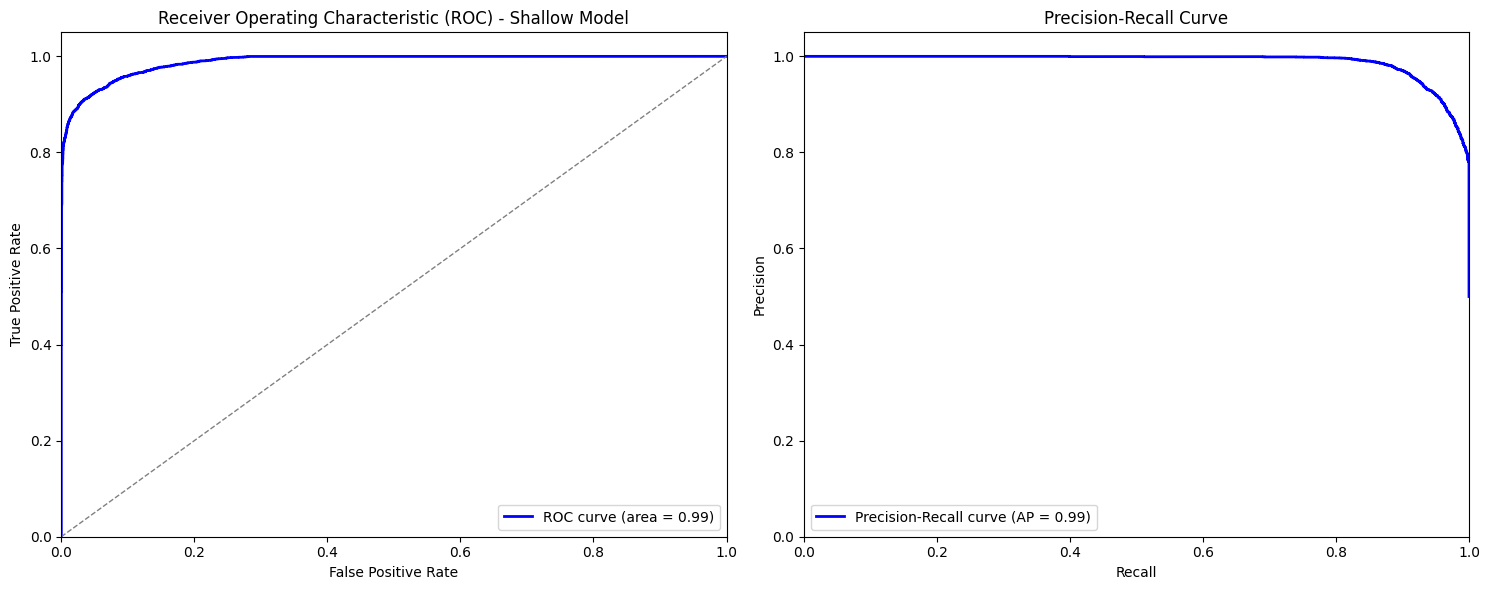

In [32]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


## ANN Shallow Model Validation

In [33]:
import psutil
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf
from keras.models import load_model

# Load the best model saved by ModelCheckpoint
best_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before validation
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for validation
start_time = time.time()

# Validate the loaded best model using validation data
evaluation = best_model.evaluate(X_val, y_val)

# Record end time for validation
end_time = time.time()

# Measure CPU and memory usage after validation
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate validation time
validation_time = end_time - start_time

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

# Assuming y_pred is the predicted probabilities and y_pred_classes are the predicted classes
y_pred = best_model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Compute additional performance metrics
precision = precision_score(y_val, y_pred_classes)
recall = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
roc_auc = roc_auc_score(y_val, y_pred)
avg_precision = average_precision_score(y_val, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred_classes).numpy()

# Print additional performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and validation time
print("CPU usage before validation:", cpu_usage_before)
print("Memory usage before validation:", memory_usage_before)
print("CPU usage after validation:", cpu_usage_after)
print("Memory usage after validation:", memory_usage_after)
print("Validation time:", validation_time)


291/291 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.9331
Validation Loss: 0.34436845779418945
Validation Accuracy: 0.9331182837486267
291/291 [==============================] - 1s 2ms/step
Precision: 0.9503577817531306
Recall: 0.9139784946236559
F1 Score: 0.9318131988598991
ROC AUC Score: 0.98458853046595
Average Precision: 0.9852845342881849
Confusion Matrix:
 [[4428  222]
 [ 400 4250]]
CPU usage before validation: 38.1
Memory usage before validation: 2084474880
CPU usage after validation: 97.9
Memory usage after validation: 2084470784
Validation time: 0.9693093299865723


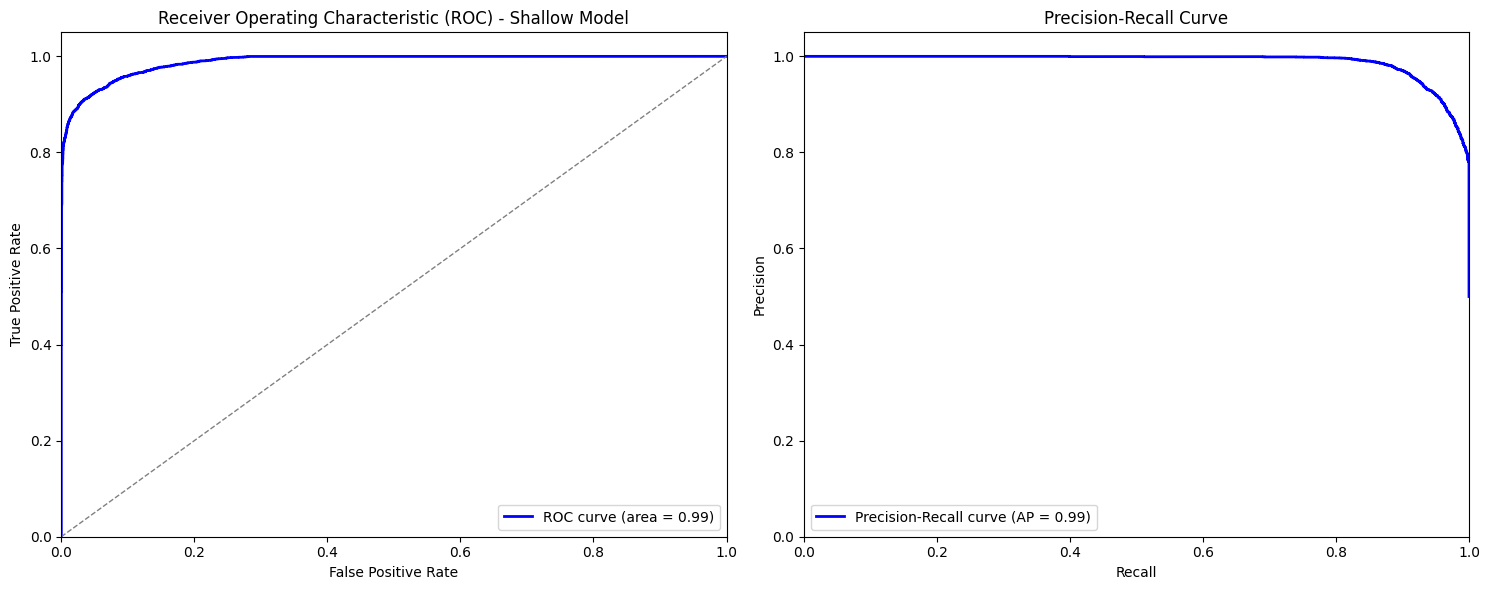

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


## Deep model Hyperparameter tuning

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions
from kerastuner import RandomSearch
from kerastuner import HyperParameters
import numpy as np
import time
import psutil
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

modelname = "deep_ann_model"
hpt_method = "random search"

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Update the model building function to include the new hyperparameters and configurations
def build_deep_ann_model(hp):
    model = Sequential()
    lu = hp['units']  # layer units
    # Input layer
    model.add(Dense(units=lu,
                    input_dim=len(features),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                    l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Hidden layers
    for i in range(1, 7):
        lu = lu / 2
        model.add(Dense(units=lu,
                        activation=hp[f'activation_layer{i + 1}'],
                        kernel_initializer=hp['weight_initializer'],
                        kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                        l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

        # Dropout layer (optional)
        if hp['use_dropout']:
            model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a HyperParameters object
hp = HyperParameters()
hp.Choice('units', [256])
# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer2', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer3', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer4', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer5', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer6', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer7', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)  # Dropout rate hyperparameter

0.0

In [36]:
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_deep_ann_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='deep_ann_hy_tuning_RS',
    hyperparameters=hp  # Use the HyperParameters object
)

# Record start time
start_time = time.time()

# Perform hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Record additional metrics
memory_usage = psutil.virtual_memory().used
cpu_usage = psutil.cpu_percent()

# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Additional regression metrics
regression_metrics = {
    'mse': test_metrics[0],  # Mean Squared Error
    'mae': test_metrics[1],  # Mean Absolute Error
    'r_squared': 1 - (np.sum((y_test - y_pred.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)),
    'explained_variance': 1 - (np.var(y_test - y_pred.flatten()) / np.var(y_test))
}

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)

print("Regression Metrics:")
for metric_name, metric_value in regression_metrics.items():
    print(f" - {metric_name}: {metric_value}")

# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
    'regression_metrics': regression_metrics
}
print(experiment_details)
hp_array.append(experiment_details)


Trial 20 Complete [00h 03m 24s]
val_accuracy: 0.5028674006462097

Best val_accuracy So Far: 0.9245818257331848
Total elapsed time: 00h 55m 55s
Epoch 1/100
4185/4185 [==============================] - 14s 3ms/step - loss: 0.5147 - accuracy: 0.8764 - val_loss: 0.3879 - val_accuracy: 0.8844
Epoch 2/100
4185/4185 [==============================] - 13s 3ms/step - loss: 0.3486 - accuracy: 0.8888 - val_loss: 0.3523 - val_accuracy: 0.8692
Epoch 3/100
4185/4185 [==============================] - 12s 3ms/step - loss: 0.3047 - accuracy: 0.8936 - val_loss: 0.2892 - val_accuracy: 0.8972
Epoch 4/100
4185/4185 [==============================] - 13s 3ms/step - loss: 0.2803 - accuracy: 0.8957 - val_loss: 0.2702 - val_accuracy: 0.8986
Epoch 5/100
4185/4185 [==============================] - 12s 3ms/step - loss: 0.2645 - accuracy: 0.9072 - val_loss: 0.2576 - val_accuracy: 0.9155
Epoch 6/100
4185/4185 [==============================] - 13s 3ms/step - loss: 0.2538 - accuracy: 0.9157 - val_loss: 0.2502 - va

In [37]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)


Epoch with maximum validation accuracy: 84
Maximum validation accuracy: 0.9306451678276062
Epoch with minimum validation loss: 97
Minimum validation loss: 0.1915847510099411


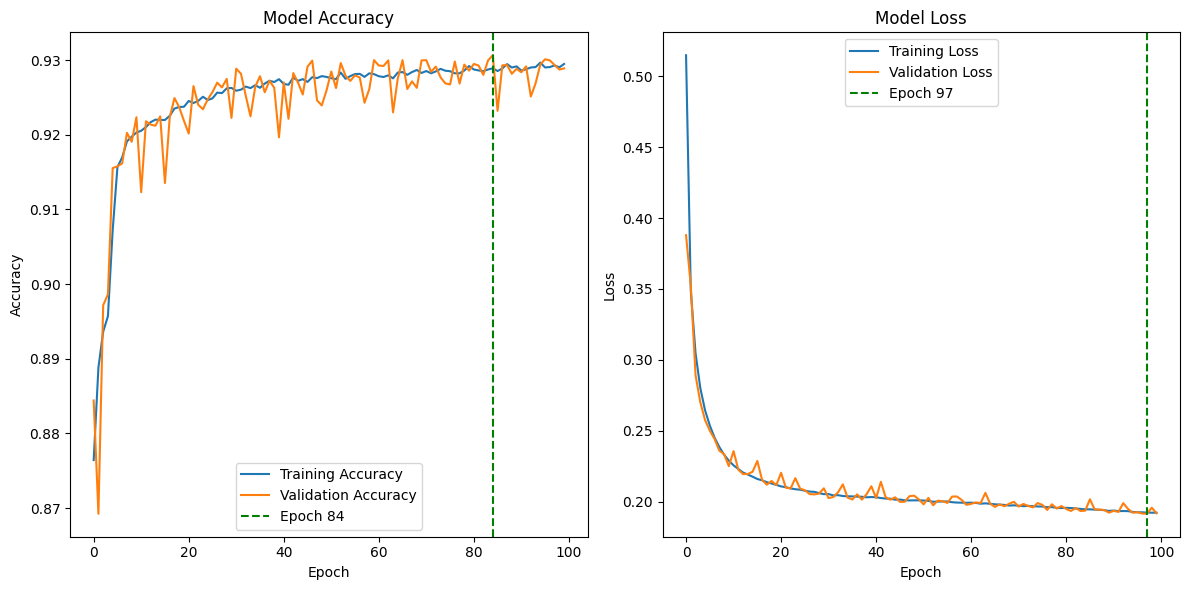

In [38]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].axvline(x=84, color='g', linestyle='--', label='Epoch 84')  # Vertical line at epoch 60
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].axvline(x=97, color='g', linestyle='--', label='Epoch 97')  # Vertical line at epoch 60
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


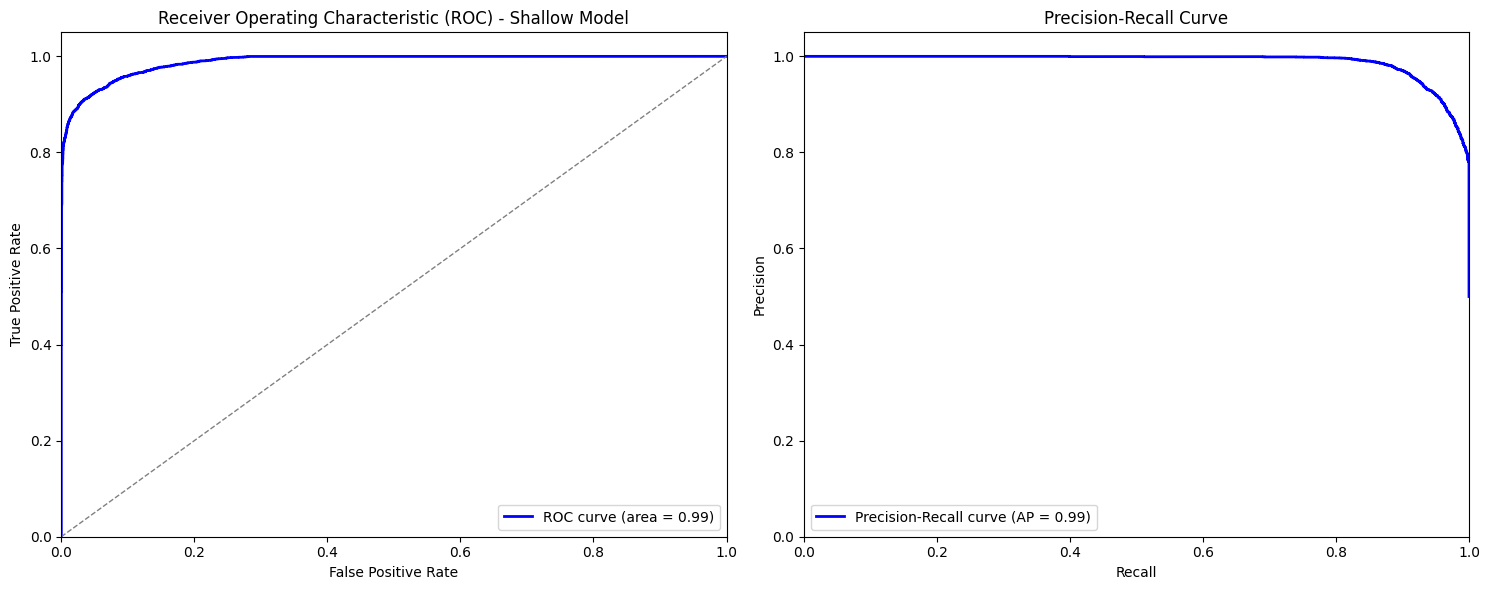

In [39]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()




In [40]:
from keras.callbacks import ModelCheckpoint

# Define the filepath to save the model
checkpoint_filepath = deep_model_path_best_hp

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint(checkpoint_filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with early stopping and ModelCheckpoint callback
history = best_model.fit(X_train, y_train,
                          epochs=max_val_acc_epoch,
                          validation_split=0.2,
                          callbacks=[checkpoint])



Epoch 1/84
4183/4185 [============================>.] - ETA: 0s - loss: 0.5227 - accuracy: 0.8926
Epoch 1: val_accuracy improved from -inf to 0.90675, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/deep_model_ANN5_hp.keras
4185/4185 [==============================] - 15s 3ms/step - loss: 0.5227 - accuracy: 0.8926 - val_loss: 0.4010 - val_accuracy: 0.9068
Epoch 2/84
4165/4185 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.9110
Epoch 2: val_accuracy improved from 0.90675 to 0.91747, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/deep_model_ANN5_hp.keras
4185/4185 [==============================] - 14s 3ms/step - loss: 0.3524 - accuracy: 0.9110 - val_loss: 0.3173 - val_accuracy: 0.9175
Epoch 3/84
4173/4185 [============================>.] - ETA: 0s - loss: 0.3017 - accuracy: 0.9150
Epoch 3: val_accuracy improved from 0.91747 to 0.92049, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/deep_mo

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               5376      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                

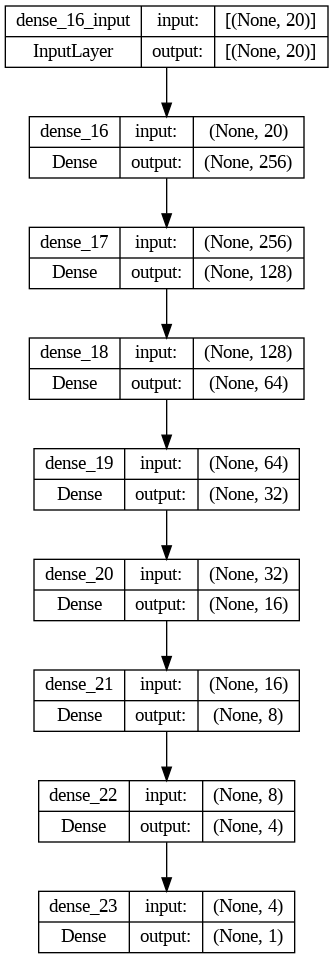

In [41]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model, Model

best_model =load_model(checkpoint_filepath)

# Display the summary of the loaded model
best_model.summary()

# Plot the architecture of the loaded model
plot_model(best_model, to_file='deep_model_best_plot.png', show_shapes=True, show_layer_names=True)


Testing Deep Model

In [42]:
import psutil
import time
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf

# Load the saved model
saved_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before prediction
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for prediction
start_time = time.time()

# Assuming X_test and y_test are your test data
# Predict on the test data
y_pred = saved_model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Record end time for prediction
end_time = time.time()

# Measure CPU and memory usage after prediction
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate prediction time
prediction_time = end_time - start_time

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Print performance metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and prediction time
print("CPU usage before prediction:", cpu_usage_before)
print("Memory usage before prediction:", memory_usage_before)
print("CPU usage after prediction:", cpu_usage_after)
print("Memory usage after prediction:", memory_usage_after)
print("Prediction time:", prediction_time)



291/291 [==============================] - 1s 2ms/step
Test Accuracy: 0.9345161290322581
Precision: 0.9412535488097838
Recall: 0.9268817204301075
F1 Score: 0.9340123523675371
ROC AUC Score: 0.9862718002081167
Average Precision: 0.9869700332177566
Confusion Matrix:
 [[4381  269]
 [ 340 4310]]
CPU usage before prediction: 59.8
Memory usage before prediction: 2252087296
CPU usage after prediction: 82.1
Memory usage after prediction: 2262331392
Prediction time: 1.4249088764190674


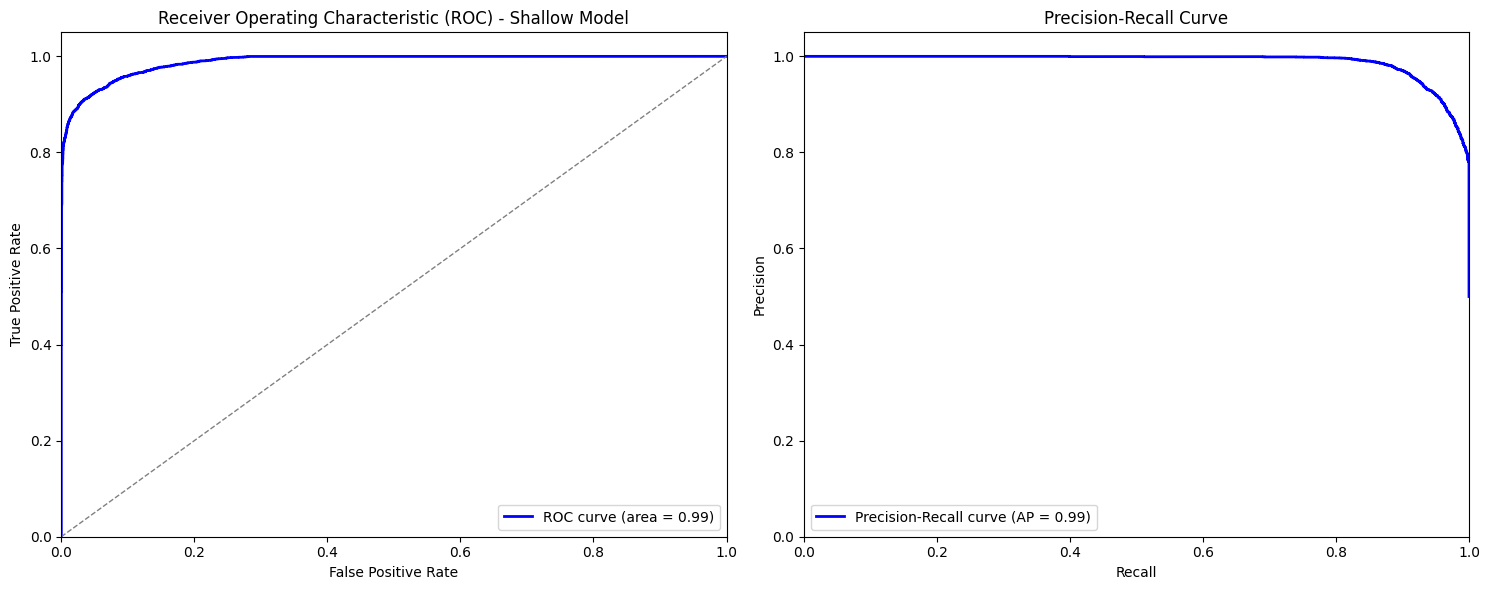

In [43]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


## Deep Model Validation

In [44]:
import psutil
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf
from keras.models import load_model

# Load the best model saved by ModelCheckpoint
best_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before validation
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for validation
start_time = time.time()

# Validate the loaded best model using validation data
evaluation = best_model.evaluate(X_val, y_val)

# Record end time for validation
end_time = time.time()

# Measure CPU and memory usage after validation
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate validation time
validation_time = end_time - start_time

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

# Assuming y_pred is the predicted probabilities and y_pred_classes are the predicted classes
y_pred = best_model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Compute additional performance metrics
precision = precision_score(y_val, y_pred_classes)
recall = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
roc_auc = roc_auc_score(y_val, y_pred)
avg_precision = average_precision_score(y_val, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred_classes).numpy()

# Print additional performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and validation time
print("CPU usage before validation:", cpu_usage_before)
print("Memory usage before validation:", memory_usage_before)
print("CPU usage after validation:", cpu_usage_after)
print("Memory usage after validation:", memory_usage_after)
print("Validation time:", validation_time)



291/291 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9319
Validation Loss: 0.18743796646595
Validation Accuracy: 0.9319354891777039
291/291 [==============================] - 0s 1ms/step
Precision: 0.9424983476536682
Recall: 0.92
F1 Score: 0.9311132876265099
ROC AUC Score: 0.9846041160827841
Average Precision: 0.9852455609714896
Confusion Matrix:
 [[4389  261]
 [ 372 4278]]
CPU usage before validation: 14.6
Memory usage before validation: 2264645632
CPU usage after validation: 50.5
Memory usage after validation: 2264899584
Validation time: 0.9778861999511719


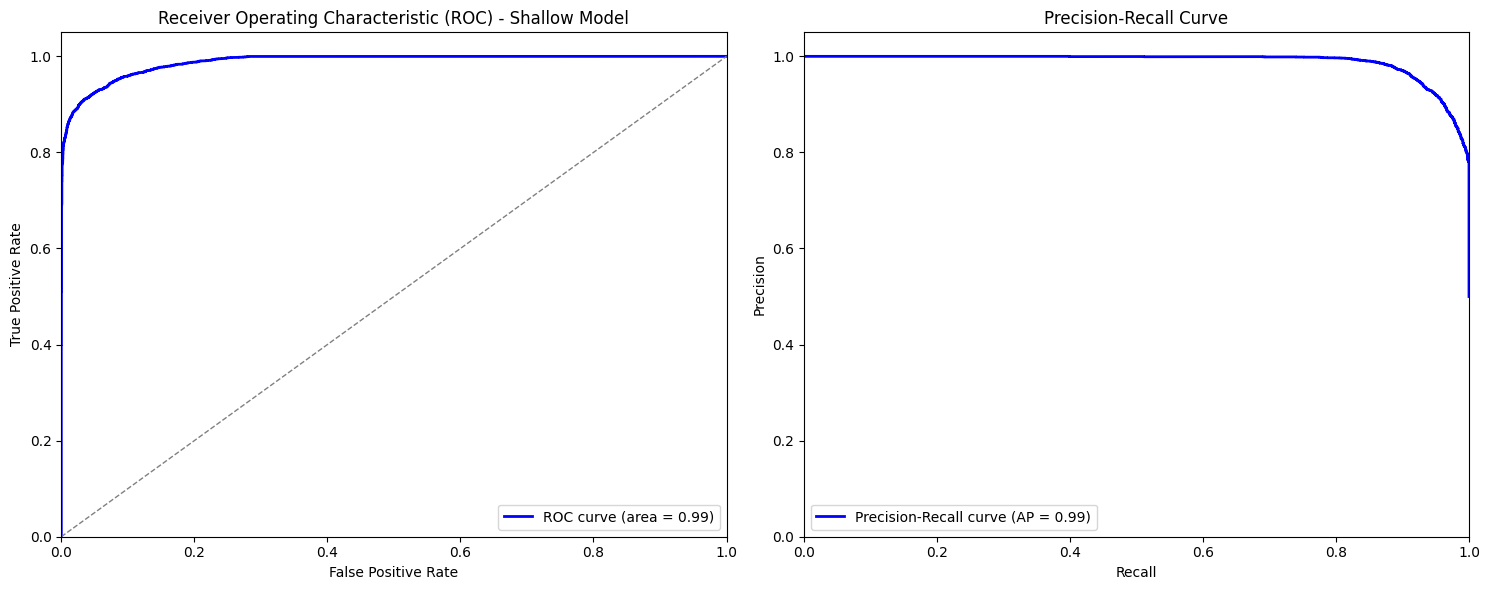

In [45]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()




In [46]:
import datetime

# Get the current datetime
current_datetime = datetime.datetime.now()

# Add a time delta (5 hours and 30 minutes)
time_delta = datetime.timedelta(hours=5, minutes=30)
updated_datetime = current_datetime + time_delta

# Format the updated datetime
formatted_datetime = updated_datetime.strftime("%Y-%m-%d %H:%M:%S")
print("Updated Datetime:", formatted_datetime)

Updated Datetime: 2024-04-04 01:54:46


## Save Hyperparameters 25

In [47]:

# Convert hp_array to DataFrame
df = pd.DataFrame(hp_array)
print(df)
# Save DataFrame to CSV
df.to_csv(f_hp_data, index=False)
print (f_hp_data, "saved")

            model     hpt_method  \
0   shallow_model  random search   
1  deep_ann_model  random search   

                                best_hyperparameters  elapsed_time  \
0  {'activation_layer1': 'relu', 'optimizer': 'ad...   2255.814550   
1  {'units': 256, 'activation_layer1': 'relu', 'a...   3355.049921   

   memory_usage  cpu_usage  precision    recall  f1_score   roc_auc  \
0  1.630000e+01       66.0   0.949967  0.918710  0.934077  0.986812   
1  2.096783e+09       69.4   0.928678  0.938065  0.933348  0.986463   

             confusion_matrix  \
0  [[4425, 225], [378, 4272]]   
1  [[4315, 335], [288, 4362]]   

                                  regression_metrics  
0  {'mse': 0.15484359860420227, 'mae': 0.93516129...  
1  {'mse': 0.18428009748458862, 'mae': 0.93301075...  
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/cp2_small_data_hp.csv saved
